In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
pd.set_option('display.max_columns', None)

# Preprocessing: Clinical

In [2]:
# Load clinical data
clinical = pd.read_csv('duke_clinical_basics.tsv', sep='\t', index_col=0, dtype = object)
clinical = clinical.astype({'age':float, 'Oncotype_score':float})
clinical.head()

,age,Menopause,Race_cleaned,ER,PR,HER2,Mol_Subtype,Oncotype_score,Staging_Tumor_Size,Staging_Nodes,Staging_Metastasis,Tumor_Grade_(tubule),Tumor_Grade_(nuclear),Tumor_Grade_(mitotic),Nottingham_grade,Histologic_type,Tumor_Location,Neoadjuvant_Radiation_Therapy,Neoadjuvant_Chemotherapy,Neoadjuvant_Endocrine_Therapy,Known_Ovarian_Status,Therapeutic_or_Prophylactic_Oophorectomy,Neoadjuvant_Anti-Her2_Neu_Therapy,Received_Neoadjuvant
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,
Breast_MRI_002,38.496920,0,2,0,0,0,3,NaN,2,0,0,3,3,3,3,1,L,0,1,0,0,0,0,1
Breast_MRI_003,62.108145,1,1,1,1,0,0,8.0,2,1,0,3,2,1,NaN,NaN,NaN,0,0,1,0,0,0,1
Breast_MRI_004,58.806297,1,1,1,1,0,0,14.0,1,0,0,3,2,1,2,1,L,0,0,0,0,0,0,0
Breast_MRI_006,45.817933,0,1,1,1,0,0,7.0,1,0,0,1,1,1,NaN,NaN,NaN,0,0,0,0,0,0,0
Breast_MRI_007,44.082136,2,2,1,1,1,1,NaN,1,0,0,2,2,1,1,1,L,0,0,0,0,0,0,0


In [3]:
# Look at missingness
# clinical.isna().sum()
# sns.heatmap(clinical.isnull())
clinical.drop(['Oncotype_score'], axis=1, inplace=True)

# Drop from looking at feature importance results (later)
clinical.drop(['ER','PR','HER2','Tumor_Location','Histologic_type','age'], axis=1, inplace=True)

In [4]:
# Drop neoadjuvant columns
clinical.drop(
    ['Neoadjuvant_Radiation_Therapy',
     'Neoadjuvant_Chemotherapy',
     'Neoadjuvant_Endocrine_Therapy',
     'Neoadjuvant_Anti-Her2_Neu_Therapy'],
    axis=1,
    inplace=True
    )

In [5]:
# One-hot encode the categorical variables
clinical_dummies = pd.get_dummies(clinical)
clinical_dummies.head()

,Menopause_0,Menopause_1,Menopause_2,Race_cleaned_0,Race_cleaned_1,Race_cleaned_2,Mol_Subtype_0,Mol_Subtype_1,Mol_Subtype_2,Mol_Subtype_3,Staging_Tumor_Size_1,Staging_Tumor_Size_2,Staging_Tumor_Size_3,Staging_Tumor_Size_4,Staging_Nodes_0,Staging_Nodes_1,Staging_Nodes_2,Staging_Nodes_3,Staging_Metastasis_-1,Staging_Metastasis_0,Staging_Metastasis_1,Tumor_Grade_(tubule)_1,Tumor_Grade_(tubule)_2,Tumor_Grade_(tubule)_3,Tumor_Grade_(nuclear)_1,Tumor_Grade_(nuclear)_2,Tumor_Grade_(nuclear)_3,Tumor_Grade_(mitotic)_1,Tumor_Grade_(mitotic)_2,Tumor_Grade_(mitotic)_3,Nottingham_grade_1,Nottingham_grade_2,Nottingham_grade_3,Known_Ovarian_Status_0,Known_Ovarian_Status_1,Therapeutic_or_Prophylactic_Oophorectomy_0,Therapeutic_or_Prophylactic_Oophorectomy_1,Received_Neoadjuvant_0,Received_Neoadjuvant_1
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Breast_MRI_002,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
Breast_MRI_003,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
Breast_MRI_004,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
Breast_MRI_006,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
Breast_MRI_007,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [6]:
cols_dropDummies = [
    'Menopause_0','Menopause_2',
    'Known_Ovarian_Status_0','Therapeutic_or_Prophylactic_Oophorectomy_0',
    'Received_Neoadjuvant_0'
    ]
clinical_dummies.drop(cols_dropDummies, axis=1, inplace=True)
clinical_dummies.head()

,Menopause_1,Race_cleaned_0,Race_cleaned_1,Race_cleaned_2,Mol_Subtype_0,Mol_Subtype_1,Mol_Subtype_2,Mol_Subtype_3,Staging_Tumor_Size_1,Staging_Tumor_Size_2,Staging_Tumor_Size_3,Staging_Tumor_Size_4,Staging_Nodes_0,Staging_Nodes_1,Staging_Nodes_2,Staging_Nodes_3,Staging_Metastasis_-1,Staging_Metastasis_0,Staging_Metastasis_1,Tumor_Grade_(tubule)_1,Tumor_Grade_(tubule)_2,Tumor_Grade_(tubule)_3,Tumor_Grade_(nuclear)_1,Tumor_Grade_(nuclear)_2,Tumor_Grade_(nuclear)_3,Tumor_Grade_(mitotic)_1,Tumor_Grade_(mitotic)_2,Tumor_Grade_(mitotic)_3,Nottingham_grade_1,Nottingham_grade_2,Nottingham_grade_3,Known_Ovarian_Status_1,Therapeutic_or_Prophylactic_Oophorectomy_1,Received_Neoadjuvant_1
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Breast_MRI_002,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
Breast_MRI_003,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
Breast_MRI_004,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
Breast_MRI_006,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Breast_MRI_007,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [7]:
# Scale data when including 'age'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
clinical_scaled = scaler.fit_transform(clinical_dummies)
clinical_scaled = pd.DataFrame(clinical_scaled, columns = clinical_dummies.columns)

# clinical_scaled.head()

<AxesSubplot:>

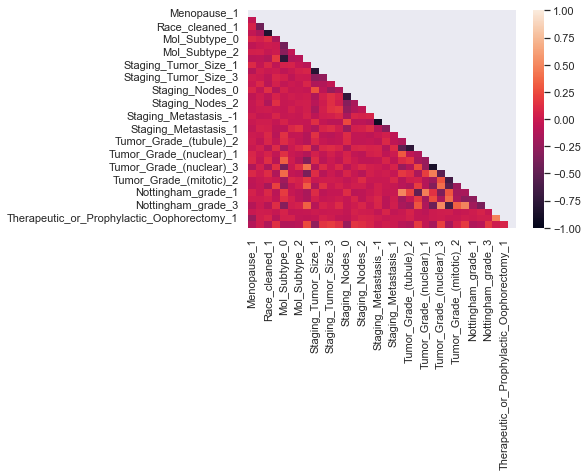

In [8]:
# Test for multicollinearity
# https://towardsdatascience.com/how-to-avoid-multicollinearity-in-categorical-data-46eb39d9cd0d
# When can we ignore multicollinearity?: https://statisticalhorizons.com/multicollinearity/

sns.set(rc = {'figure.figsize': (6, 4)})
dummies_corr = clinical_scaled.corr(method='pearson')
lower_tri = dummies_corr.where(np.tril(np.ones(dummies_corr.shape), k=-1).astype(bool))
sns.heatmap(lower_tri, vmin=-1, vmax=1)

# 1. Logistic Regression (clinical only)

In [9]:
# Split data to predictor variables and response
predictors = clinical_scaled.iloc[:, :-1]
response = clinical_scaled['Received_Neoadjuvant_1']

# Preview response classes
num_noNeo = len(clinical_scaled[clinical_scaled['Received_Neoadjuvant_1'] == 0])
num_yesNeo = len(clinical_scaled[clinical_scaled['Received_Neoadjuvant_1'] == 1])
print('No:', num_noNeo, 'Yes:', num_yesNeo)

No: 592 Yes: 243


### 1a. Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

pred_train, pred_test, resp_train, resp_test = train_test_split(
    predictors, 
    response, 
    test_size=0.3,
    random_state=7
    )
print('train set:', len(pred_train), len(resp_train),
      '\ntest set:', len(pred_test), len(resp_test))

train set: 584 584 
test set: 251 251


No: 410 Yes: 174
No: 182 Yes: 69


<AxesSubplot:xlabel='Received_Neoadjuvant_1', ylabel='count'>

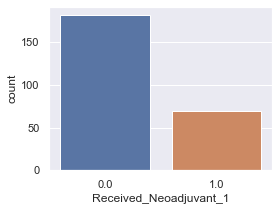

In [11]:
# Preview classes of response variable (train set)
respTrain_df = resp_train.to_frame().reset_index(drop=True)
num_noNeo = len(respTrain_df[respTrain_df['Received_Neoadjuvant_1'] == 0])
num_yesNeo = len(respTrain_df[respTrain_df['Received_Neoadjuvant_1'] == 1])
print('No:', num_noNeo, 'Yes:', num_yesNeo)

sns.set(rc = {'figure.figsize': (4, 3)})
# sns.countplot(x=resp_train)

# Preview classes of response variable (test set)
respTest_df = resp_test.to_frame().reset_index(drop=True)
num_noNeo = len(respTest_df[respTest_df['Received_Neoadjuvant_1'] == 0])
num_yesNeo = len(respTest_df[respTest_df['Received_Neoadjuvant_1'] == 1])
print('No:', num_noNeo, 'Yes:', num_yesNeo)

sns.set(rc = {'figure.figsize': (4, 3)})
sns.countplot(x=resp_test)

### 1b. Train Model

https://medium.com/@curryrowan/simplified-logistic-regression-classification-with-categorical-variables-in-python-1ce50c4b137
https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

If optimize class weights: https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

Understanding logit-reg for categorical data: https://towardsdatascience.com/an-introduction-to-logistic-regression-for-categorical-data-analysis-7cabc551546c

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

logitmodel = LogisticRegression(class_weight = 'balanced')#, random_state=7)
logitmodel.fit(pred_train, resp_train)

LogisticRegression(class_weight='balanced')

In [13]:
# Prepare predicted and actual labels and create df
predicted = logitmodel.predict(pred_test)
predicted = pd.Series(predicted)
resp_test.reset_index(drop=True, inplace=True)

# Create df of results
results_df = pd.concat([predicted, resp_test], axis=1, ignore_index=True)
results_df.columns = ['predicted', 'rcd_neoadjuvant']
# results_df

### 1c. Evaluate Model

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report

print(classification_report(resp_test, predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       182
         1.0       0.48      0.68      0.56        69

    accuracy                           0.71       251
   macro avg       0.67      0.70      0.67       251
weighted avg       0.75      0.71      0.72       251



In [15]:
# https://medium.com/@kunanba/what-is-roc-auc-and-how-to-visualize-it-in-python-f35708206663
from sklearn.metrics import confusion_matrix

confMatrix = pd.DataFrame(confusion_matrix(resp_test, predicted), columns=['Pred_No','Pred_Yes'], index=['No_Neo', 'Yes_Neo'])
print(confMatrix)

tn, fp, fn, tp = confusion_matrix(resp_test, predicted).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

         Pred_No  Pred_Yes
No_Neo       131        51
Yes_Neo       22        47
True Positives: 47
False Positives: 51
True Negatives: 131
False Negatives: 22


In [16]:
# Calculating AUC-ROC
from sklearn.metrics import roc_auc_score

# Select probabilities for positive class only
probas = logitmodel.predict_proba(pred_test)[:, 1]

# Function to convert predictions to various threshold rates
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

# lists of TP & FP Rates at varying thresholds
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(resp_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

# Calculate AUC-ROC score
aucroc = roc_auc_score(resp_test, predicted)
aucroc

0.7004698200350373

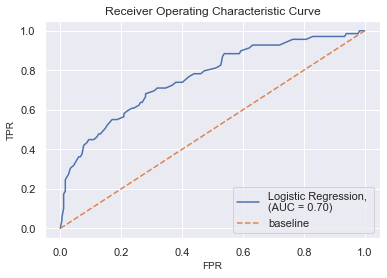

In [17]:
# Plot AUC-ROC curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fpr_values, tpr_values, label='Logistic Regression, \n(AUC = %0.2f)' % aucroc)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=12)
plt.ylabel('TPR', fontsize=10)
plt.xlabel('FPR', fontsize=10)
plt.legend(fontsize=10);
plt.legend(loc=4)

In [18]:
# Feature importance
importance = logitmodel.coef_.flatten()
importance_series = pd.Series(importance).reset_index(drop=True)
predictors_series = pred_train.columns.to_series().reset_index(drop=True)

data = {'features': predictors_series, 'importance': importance_series}
importance_df = pd.DataFrame(data)
importance_df = importance_df.sort_values(by='importance', ascending=False)
# importance_df

Text(0.5, 0, 'importance_score')

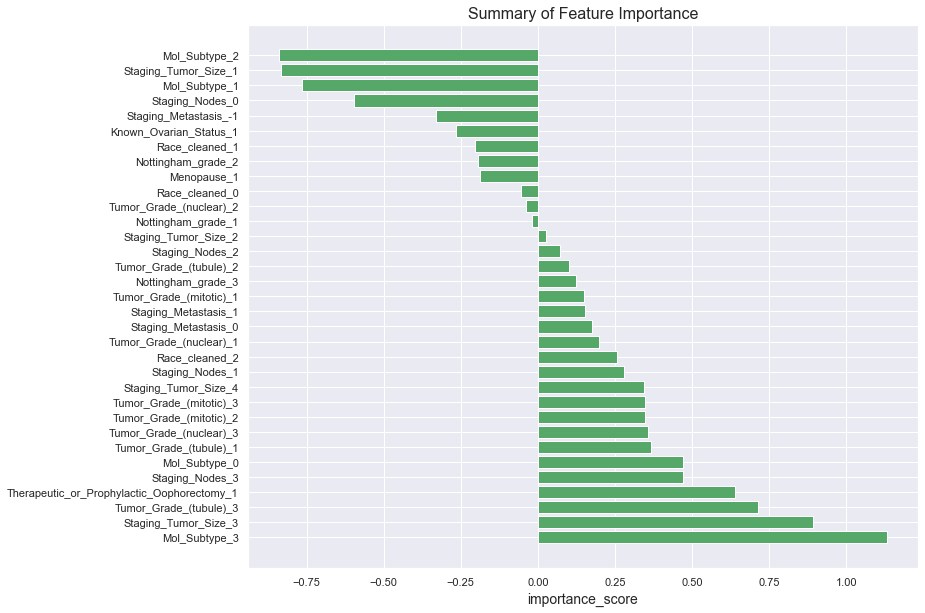

In [19]:
# Plot feature importance scores
sns.set(rc = {'figure.figsize': (12, 10)})
plt.barh(importance_df['features'], importance_df['importance'], color = 'g')
plt.title('Summary of Feature Importance', fontsize=16)
plt.xlabel('importance_score', fontsize=14)

# 2. Logistic Regression (BPE only)

In [20]:
# Load imaging data
imging = pd.read_csv('duke_clinical_imaging.tsv', sep='\t')
print('Shape (before dropping):', imging.shape)
imging.drop(['Patient_ID'], axis=1, inplace=True)

Shape (before dropping): (835, 73)


### 2a. Preprocess imaging data

In [21]:
# Drop columns with negative feature importance values
neg_feats = ['SER_Total_tissue_vol_cu_mm_PostCon',
             'SER_map_skewness_tissue_PostCon',
             'WashinRate_map_skewness_tissue_PostCon',
             'PE_map_kurtosis_tissue_PostCon',
             'SER_Washout_tissue_vol_cu_mm_PostCon',
             'PE_map_sum_variance__tissue_PostCon',
             'SER_map_information_measure_correlation2_tissue_PostCon',
             'Grouping_based_mean_of_washout_slope_3D_tissue_T1_Group_2',
             'Ratio_Tissue_vol_enhancing_more_than_0percent_from_PostCon_to_Breast_Vol',
             'SER_map_sum_average_tissue_PostCon',
             'Grouping_based_mean_of_washout_slope_3D_tissue_PostCon_Group_2',
             'Grouping_based_variance_of_washout_slope_3D_tissue_T1_Group_2',
             'PE_map_Cluster_Prominence_tissue_PostCon',
             'PE_map_Energy_tissue_T1',
             'SER_Washout_tissue_vol_cu_mm_T1',
             'Grouping_based_proportion_of_3D_tissue_PostCon_Group_2',
             'WashinRate_map_Cluster_Shade_tissue_PostCon',
             'SER_map_Max_Probability_tissue_PostCon',
             'WashinRate_map_Autocorrelation_tissue_PostCon',
             'SER_map_Cluster_Shade_tissue_T1',
             'PE_map_kurtosis_tissue_T1',
             'SER_map_Cluster_Prominence_tissue_PostCon',
             'information_measure_correlation2_tissue_T1',
             'WashinRate_map_kurtosis_tissue_PostCon',
             'SER_map_mean_tissue_T1',
             'Peak_SER_tissue_PostCon',
             'Ratio_Tissue_vol_enhancing_more_than_0percent_from_PostCon_to_Tissue_Vol',
             'Grouping_based_proportion_of_3D_tissue_T1_Group_3',
             'Cluster_Shade_tissue_T1',
             'PE_map_information_measure_correlation2_tissue_T1',
             'Grouping_based_proportion_of_3D_tissue_T1_Group_1',
             'SER_map_std_dev_tissue_PostCon',
             'Correlation2_tissue_PostCon']

imging.drop(neg_feats, axis=1, inplace =True)
imging.shape
img_cols = imging.columns
# list(imging.columns)

In [22]:
imging = scaler.fit_transform(imging)
imging = pd.DataFrame(imging, columns = img_cols)
imging = imging.astype(np.float64)

### 2b. Train/Test Split

In [23]:
# from random import *
# imging_norowindex = imging.reset_index(drop=True)
# img_withLabels = pd.concat([imging_norowindex, response], axis=1)

# rand1 = randint(0, len(imging.columns)-1)
# rand2 = randint(0, len(imging.columns)-1)
# print(rand1, rand2, len(img_withLabels.columns)-1)
# random_subset = img_withLabels.iloc[:, [rand1, rand2, (len(img_withLabels.columns)-1)]]

# X = random_subset[random_subset['Received_Neoadjuvant_1']==1.0]
# y  = random_subset[random_subset['Received_Neoadjuvant_1']==0.0]

# # Create a scatter plot
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color='green', marker='o', label='yes_Neo')
# plt.scatter(y.iloc[:, 0], y.iloc[:, 1], color='blue', marker='o', label='no_Neo')
# plt.xlabel(X.iloc[:, 0].name)
# plt.ylabel(X.iloc[:, 1].name)
# plt.legend(loc='upper left')
# plt.show()

In [24]:
# Use same response variables from clinical_scaled (matched already)
response = clinical_scaled['Received_Neoadjuvant_1']

In [25]:
pred_train, pred_test, resp_train, resp_test = train_test_split(
    imging, 
    response, 
    test_size=0.3,
    random_state=7
    )
print('train set:', len(pred_train), len(resp_train),
      '\ntest set:', len(pred_test), len(resp_test))

train set: 584 584 
test set: 251 251


In [26]:
# Preview classes of response variable (train set)
respTrain_df = resp_train.to_frame().reset_index(drop=True)
num_noNeo = len(respTrain_df[respTrain_df['Received_Neoadjuvant_1'] == 0])
num_yesNeo = len(respTrain_df[respTrain_df['Received_Neoadjuvant_1'] == 1])
print('No:', num_noNeo, 'Yes:', num_yesNeo)

sns.set(rc = {'figure.figsize': (4, 3)})
# sns.countplot(x=resp_train)

# Preview classes of response variable (test set)
respTest_df = resp_test.to_frame().reset_index(drop=True)
num_noNeo = len(respTest_df[respTest_df['Received_Neoadjuvant_1'] == 0])
num_yesNeo = len(respTest_df[respTest_df['Received_Neoadjuvant_1'] == 1])
print('No:', num_noNeo, 'Yes:', num_yesNeo)

sns.set(rc = {'figure.figsize': (4, 3)})
# sns.countplot(x=resp_test)

No: 410 Yes: 174
No: 182 Yes: 69


### 2c. Train Model

In [27]:
logitmodel = LogisticRegression(class_weight = 'balanced')#, random_state=7)
logitmodel.fit(pred_train, resp_train)

LogisticRegression(class_weight='balanced')

In [28]:
# Prepare predicted and actual labels and create df
predicted = logitmodel.predict(pred_test)
predicted = pd.Series(predicted)
resp_test.reset_index(drop=True, inplace=True)

# Create df of results
results_df = pd.concat([predicted, resp_test], axis=1, ignore_index=True)
results_df.columns = ['predicted', 'rcd_neoadjuvant']
# results_df

### 2d. Evaluate Model

In [29]:
print(classification_report(resp_test, predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66       182
         1.0       0.35      0.62      0.45        69

    accuracy                           0.58       251
   macro avg       0.57      0.59      0.55       251
weighted avg       0.67      0.58      0.60       251



In [30]:
# Confusion Matrix
confMatrix = pd.DataFrame(confusion_matrix(resp_test, predicted), columns=['Pred_No','Pred_Yes'], index=['No_Neo', 'Yes_Neo'])
print(confMatrix)

tn, fp, fn, tp = confusion_matrix(resp_test, predicted).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

         Pred_No  Pred_Yes
No_Neo       102        80
Yes_Neo       26        43
True Positives: 43
False Positives: 80
True Negatives: 102
False Negatives: 26


In [31]:
# Calculating AUC-ROC
from sklearn.metrics import roc_auc_score

# Select probabilities for positive class only
probas = logitmodel.predict_proba(pred_test)[:, 1]

# Function to convert predictions to various threshold rates
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

# lists of TP & FP Rates at varying thresholds
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(resp_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

# Calculate AUC-ROC score
aucroc = roc_auc_score(resp_test, predicted)
aucroc

0.591813983118331

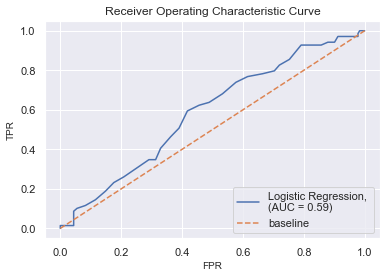

In [32]:
# Plot AUC-ROC curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fpr_values, tpr_values, label='Logistic Regression, \n(AUC = %0.2f)' % aucroc)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=12)
plt.ylabel('TPR', fontsize=10)
plt.xlabel('FPR', fontsize=10)
plt.legend(fontsize=10);
plt.legend(loc=4)

In [33]:
# Feature importance
importance = logitmodel.coef_.flatten()
importance_series = pd.Series(importance).reset_index(drop=True)
predictors_series = pred_train.columns.to_series().reset_index(drop=True)

data = {'features': predictors_series, 'importance': importance_series}
importance_df = pd.DataFrame(data)
importance_df = importance_df.sort_values(by='importance', ascending=False)

In [34]:
# neg_feats = importance_df[importance_df['importance'] < 0]
# cols_neg = list(neg_feats['features'])
# cols_neg

Text(0.5, 0, 'importance_score')

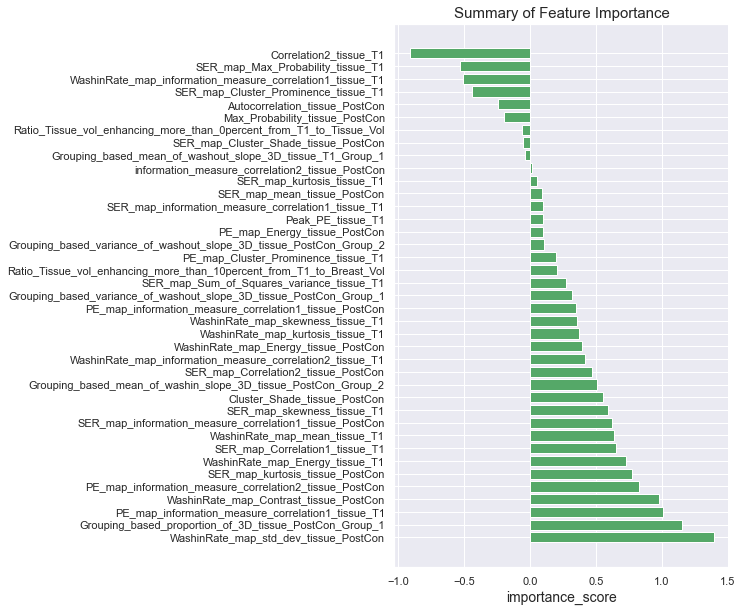

In [35]:
# Plot feature importance scores
sns.set(rc = {'figure.figsize': (6, 10)})
plt.barh(importance_df['features'], importance_df['importance'], color = 'g')
plt.title('Summary of Feature Importance', fontsize=15)
plt.xlabel('importance_score',fontsize=14)

# 3. Logistic Regression (Clinical & BPE)

In [38]:
clinical_dummies2 = clinical_dummies.iloc[:, :-1].reset_index(drop=True)

In [39]:
# Prepare df of predictor vars and the response var
preds_df = pd.concat([clinical_dummies2, imging], axis=1)
print(preds_df.shape)
response = clinical_scaled['Received_Neoadjuvant_1']

(835, 72)


### 3a. Preprocess combined data

In [41]:
scaler = MinMaxScaler() 
comb_preds_scaled = scaler.fit_transform(preds_df)
comb_preds_scaled = pd.DataFrame(comb_preds_scaled, columns = preds_df.columns)
comb_preds_scaled

,Menopause_1,Race_cleaned_0,Race_cleaned_1,Race_cleaned_2,Mol_Subtype_0,Mol_Subtype_1,Mol_Subtype_2,Mol_Subtype_3,Staging_Tumor_Size_1,Staging_Tumor_Size_2,Staging_Tumor_Size_3,Staging_Tumor_Size_4,Staging_Nodes_0,Staging_Nodes_1,Staging_Nodes_2,Staging_Nodes_3,Staging_Metastasis_-1,Staging_Metastasis_0,Staging_Metastasis_1,Tumor_Grade_(tubule)_1,Tumor_Grade_(tubule)_2,Tumor_Grade_(tubule)_3,Tumor_Grade_(nuclear)_1,Tumor_Grade_(nuclear)_2,Tumor_Grade_(nuclear)_3,Tumor_Grade_(mitotic)_1,Tumor_Grade_(mitotic)_2,Tumor_Grade_(mitotic)_3,Nottingham_grade_1,Nottingham_grade_2,Nottingham_grade_3,Known_Ovarian_Status_1,Therapeutic_or_Prophylactic_Oophorectomy_1,Ratio_Tissue_vol_enhancing_more_than_10percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_0percent_from_T1_to_Tissue_Vol,Grouping_based_mean_of_washout_slope_3D_tissue_T1_Group_1,Grouping_based_mean_of_washin_slope_3D_tissue_PostCon_Group_2,Grouping_based_proportion_of_3D_tissue_PostCon_Group_1,Peak_PE_tissue_T1,WashinRate_map_mean_tissue_T1,SER_map_mean_tissue_PostCon,Correlation2_tissue_T1,Autocorrelation_tissue_PostCon,Cluster_Shade_tissue_PostCon,Max_Probability_tissue_PostCon,information_measure_correlation2_tissue_PostCon,SER_map_Correlation1_tissue_T1,SER_map_Cluster_Prominence_tissue_T1,SER_map_Max_Probability_tissue_T1,SER_map_Sum_of_Squares_variance_tissue_T1,SER_map_information_measure_correlation1_tissue_T1,PE_map_Cluster_Prominence_tissue_T1,PE_map_information_measure_correlation1_tissue_T1,WashinRate_map_Energy_tissue_T1,WashinRate_map_information_measure_correlation1_tissue_T1,WashinRate_map_information_measure_correlation2_tissue_T1,SER_map_Correlation2_tissue_PostCon,SER_map_Cluster_Shade_tissue_PostCon,SER_map_information_measure_correlation1_tissue_PostCon,PE_map_Energy_tissue_PostCon,PE_map_information_measure_correlation1_tissue_PostCon,PE_map_information_measure_correlation2_tissue_PostCon,WashinRate_map_Contrast_tissue_PostCon,WashinRate_map_Energy_tissue_PostCon,Grouping_based_variance_of_washout_slope_3D_tissue_PostCon_Group_1,Grouping_based_variance_of_washout_slope_3D_tissue_PostCon_Group_2,SER_map_skewness_tissue_T1,SER_map_kurtosis_tissue_T1,WashinRate_map_skewness_tissue_T1,WashinRate_map_kurtosis_tissue_T1,SER_map_kurtosis_tissue_PostCon,WashinRate_map_std_dev_tissue_PostCon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.465621,0.700523,0.193416,0.050025,0.370223,0.028745,0.099648,0.380640,0.639270,0.561764,0.033850,0.065651,0.671914,0.038669,0.005291,0.786917,0.200567,0.989480,0.015478,0.868474,0.000864,0.910535,0.460855,0.131402,0.663544,0.982641,0.862437,0.654151,0.235237,0.152693,0.034246,0.000641,0.001440,0.452356,0.099834,0.731188,0.002667,0.042749,0.080343
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322616,0.744969,0.453043,0.148604,0.410981,0.190052,0.140263,0.604738,0.488051,0.078512,0.185423,0.547656,0.578585,0.307599,0.000141,0.331747,0.351595,0.980082,0.002411,0.918340,0.002334,0.875651,0.538604,0.541418,0.652163,0.971144,0.972556,0.682574,0.097088,0.171994,0.266406,0.072646,0.031866,0.507047,0.550405,0.791206,0.012030,0.179582,0.126644
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.138954,0.666660,0.546348,0.212619,0.891591,0.054174,0.049587,0.556958,0.364115,0.060502,0.127672,0.615639,0.503053,0.020527,0.120299,0.516540,0.437979,0.998430,0.035834,0.979889,0.001578,0.991821,0.060099,0.094190,0.646176,0.993783,0.372422,0.979733,0.126934,0.131085,0.325008,0.062772,0.077113,0.433417,0.036735,0.741169,0.004163,0.007130,0.065286
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522351,0.692873,0.236818,0.198494,0.152484,0.088798,0.361473,0.493431,0.733656,0.308590,0.136493,0

### 3b. Test/Train Split

In [42]:
pred_train, pred_test, resp_train, resp_test = train_test_split(
    comb_preds_scaled, 
    response, 
    test_size=0.3,
    random_state=7
    )
print('train set:', len(pred_train), len(resp_train),
      '\ntest set:', len(pred_test), len(resp_test))

train set: 584 584 
test set: 251 251


### 3c. Train Model

In [43]:
logitmodel = LogisticRegression(class_weight = 'balanced')#, random_state=7)
logitmodel.fit(pred_train, resp_train)

LogisticRegression(class_weight='balanced')

In [44]:
# Prepare predicted and actual labels and create df
predicted = logitmodel.predict(pred_test)
predicted = pd.Series(predicted)
resp_test.reset_index(drop=True, inplace=True)

# Create df of results
results_df = pd.concat([predicted, resp_test], axis=1, ignore_index=True)
results_df.columns = ['predicted', 'rcd_neoadjuvant']
# results_df

### 3c. Evaluate Model

In [45]:
print('Classification Report:\n', classification_report(resp_test, predicted))

confMatrix = pd.DataFrame(confusion_matrix(resp_test, predicted), columns=['Pred_No','Pred_Yes'], index=['No_Neo', 'Yes_Neo'])
print('Confusion Matrix:\n', confMatrix)

tn, fp, fn, tp = confusion_matrix(resp_test, predicted).ravel()
print(f'\nTrue Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.68      0.75       182
         1.0       0.44      0.68      0.54        69

    accuracy                           0.68       251
   macro avg       0.65      0.68      0.64       251
weighted avg       0.74      0.68      0.69       251

Confusion Matrix:
          Pred_No  Pred_Yes
No_Neo       123        59
Yes_Neo       22        47

True Positives: 47
False Positives: 59
True Negatives: 123
False Negatives: 22


In [46]:
# Calculating AUC-ROC
from sklearn.metrics import roc_auc_score

# Select probabilities for positive class only
probas = logitmodel.predict_proba(pred_test)[:, 1]

# Function to convert predictions to various threshold rates
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

# lists of TP & FP Rates at varying thresholds
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(resp_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

# Calculate AUC-ROC score
aucroc = roc_auc_score(resp_test, predicted)
aucroc

0.6784917980570154

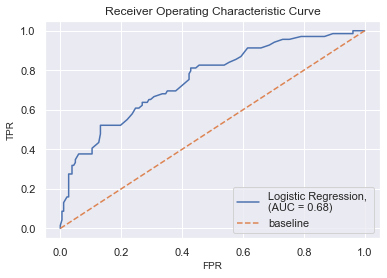

In [47]:
# Plot AUC-ROC curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fpr_values, tpr_values, label='Logistic Regression, \n(AUC = %0.2f)' % aucroc)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=12)
plt.ylabel('TPR', fontsize=10)
plt.xlabel('FPR', fontsize=10)
plt.legend(fontsize=10);
plt.legend(loc=4)

In [48]:
# Feature importance
importance = logitmodel.coef_.flatten()
importance_series = pd.Series(importance).reset_index(drop=True)
predictors_series = pred_train.columns.to_series().reset_index(drop=True)

data = {'features': predictors_series, 'importance': importance_series}
importance_df = pd.DataFrame(data)
importance_df = importance_df.sort_values(by='importance', ascending=False)

pos_feats = importance_df[importance_df['importance'] > 0]
pos_feats = list(pos_feats['features'])
# print(pos_feats)

Text(0.5, 0, 'importance_score')

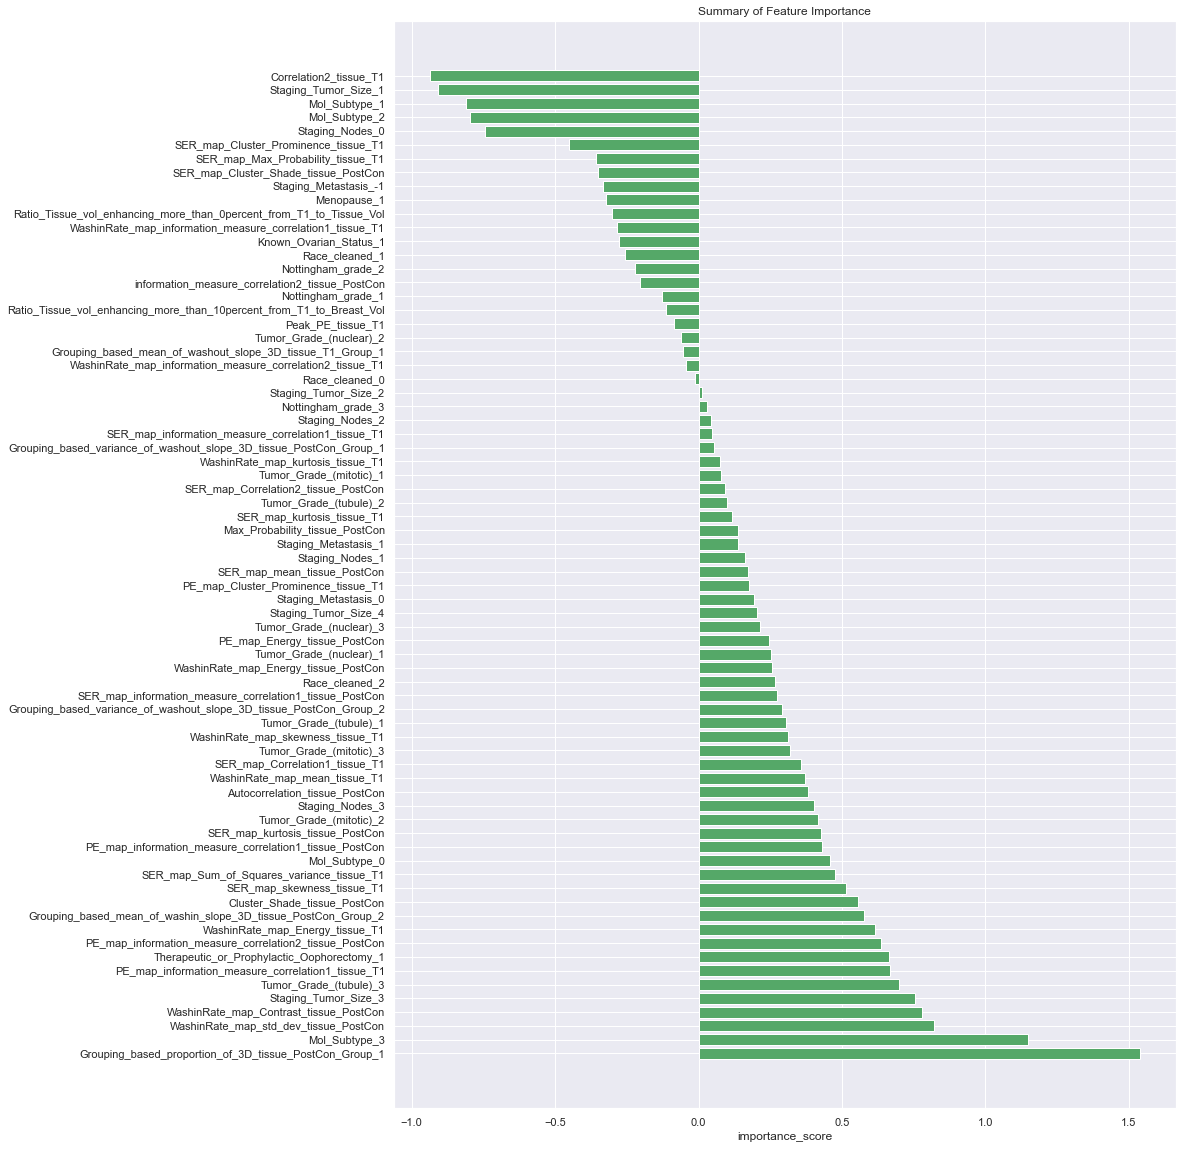

In [50]:
# Plot feature importance scores
sns.set(rc = {'figure.figsize': (14, 20)})
plt.barh(importance_df['features'], importance_df['importance'], color = 'g')
plt.title('Summary of Feature Importance')
plt.xlabel('importance_score')